# Using DBSCAN for clustering
## Using single-cell gene expression dataset

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
df = pd.read_csv('https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv')

In [8]:
clusters = DBSCAN(eps=4.54, min_samples=4)
# Create object
# eps -> minimul distance, min_samples -> min samples for core points, rest are border or noise pts

In [9]:
clusters.fit(df)
# Fit

DBSCAN(eps=4.54, min_samples=4)

In [16]:
lables = clusters.labels_
lables.shape
# Get labels 

(4406,)

In [18]:
unique_clusters = set(lables)
unique_clusters
# create a set of ujnique labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [31]:
cluster_sizes = Counter(lables)
len(cluster_sizes)
cluster_sizes

Counter({1: 1524,
         0: 870,
         2: 769,
         3: 301,
         7: 283,
         5: 246,
         6: 232,
         4: 153,
         8: 11,
         10: 8,
         9: 6,
         -1: 3})

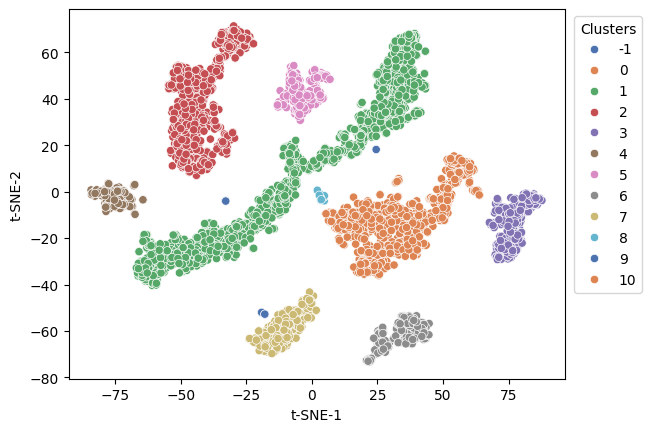

In [33]:
p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=lables, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.), title='Clusters')
plt.show()

# Mall customer Segmenation

In [34]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('dataset/MallCustomers/mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
x_train = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [41]:
clustering = DBSCAN(eps=12.5, min_samples=4)

In [42]:
clustering.fit(x_train)

DBSCAN(eps=12.5, min_samples=4)

In [44]:
DBSCAN_dataset = x_train.copy() # Creating a deep copy insted of shallow copy
DBSCAN_dataset['Cluster'] = clustering.labels_
DBSCAN_dataset

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [47]:
cluster_counts = DBSCAN_dataset['Cluster'].value_counts()
cluster_counts

Cluster
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64

In [48]:
set(DBSCAN_dataset['Cluster'])

{-1, 0, 1, 2, 3, 4}

In [51]:
Counter(DBSCAN_dataset['Cluster'])

Counter({0: 112, 2: 34, 3: 24, -1: 18, 1: 8, 4: 4})

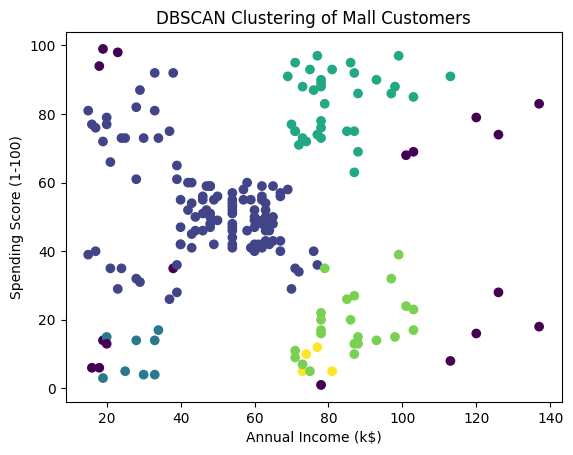

In [57]:
plt.scatter(DBSCAN_dataset['Annual Income (k$)'], DBSCAN_dataset['Spending Score (1-100)'], c=DBSCAN_dataset['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

----------

# Synthetic Data Generatiion

In [59]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [61]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, _ = make_blobs(n_samples=750, centers=centers , cluster_std=0.4, random_state=0)

In [63]:
x = StandardScaler().fit_transform(x)

In [74]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(x)

DBSCAN(eps=0.2, min_samples=3)

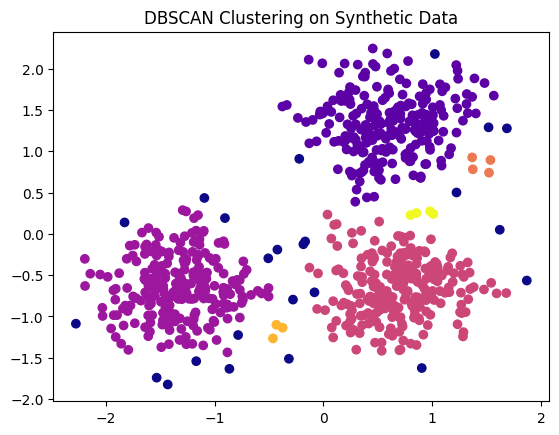

In [75]:
plt.scatter(x[:,0],x[:,1], c=dbscan.labels_, cmap='plasma')
plt.title('DBSCAN Clustering on Synthetic Data')
plt.show()